# Exploratory Data Analysis

## Haberman's Survival Data Set
Survival of patients who had undergone surgery for breast cancer

Description

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

https://www.kaggle.com/gilsousa/habermans-survival-data-set

About this file

    Title: Haberman's Survival Data

    Sources:
    (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
    (b) Date: March 4, 1999

    Past Usage:
        Haberman, S. J. (1976). Generalized Residuals for Log-Linear
        Models, Proceedings of the 9th International Biometrics
        Conference, Boston, pp. 104-122.
        Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
        Graphical Models for Assessing Logistic Regression Models (with
        discussion), Journal of the American Statistical Association 79:
        61-83.
        Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
        Department of Statistics, University of Wisconsin, Madison, WI.

    Relevant Information:
    The dataset contains cases from a study that was conducted between
    1958 and 1970 at the University of Chicago's Billings Hospital on
    the survival of patients who had undergone surgery for breast
    cancer.

    Number of Instances: 306

    Number of Attributes: 4 (including the class attribute)

    Attribute Information:
        Age of patient at time of operation (numerical)
        Patient's year of operation (year - 1900, numerical)
        Number of positive axillary nodes detected (numerical)
        Survival status (class attribute)
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 year

    Missing Attribute Values: None

tag
30
sort

Age
tag
64
sort

Op_Year


In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod haberman.csv https://www.kaggle.com/gilsousa/habermans-survival-data-set'''
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")
print("Data set has {} attributes and {} instances.".format(haberman.shape[1], haberman.shape[0]))
#haberman.shape

Data set has 4 attributes and 305 instances.


In [81]:
print(haberman.info())
print("\nThe head elements:\n")
print(haberman.head(5))
print("\nThe tail elements:\n")
print(haberman.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None

The head elements:

   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1

The tail elements:

     30  64  1  1.1
300  75  62  1    1
301  76  67  0    1
302  77  65  3    1
303  78  65  1    2
304  83  58  2    2


In [82]:
print(haberman.columns)
haberman.columns = ['patient_age','operation_year','axillary_nodes',
                     'survival_status']
print("\nGiving meaningful column names...\n")
print(haberman.head(5))

Index(['30', '64', '1', '1.1'], dtype='object')

Giving meaningful column names...

   patient_age  operation_year  axillary_nodes  survival_status
0           30              62               3                1
1           30              65               0                1
2           31              59               2                1
3           31              65               4                1
4           33              58              10                1


In [83]:
print("The number of instances of each class in survival status column:")
print(haberman['survival_status'].value_counts())

The number of instances of each class in survival status column:
1    224
2     81
Name: survival_status, dtype: int64


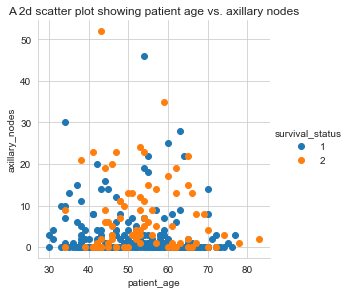

In [84]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", height=4) \
   .map(plt.scatter, "patient_age", "axillary_nodes") \
   .add_legend()
plt.title("A 2d scatter plot showing patient age vs. axillary nodes")
plt.show();

In [85]:
import plotly.express as px
fig = px.scatter_3d(haberman, x='patient_age', y='axillary_nodes', z='operation_year',
              color='survival_status', title='3d scatter plot: Operation year, axillary nodes and patient age')
fig.show()

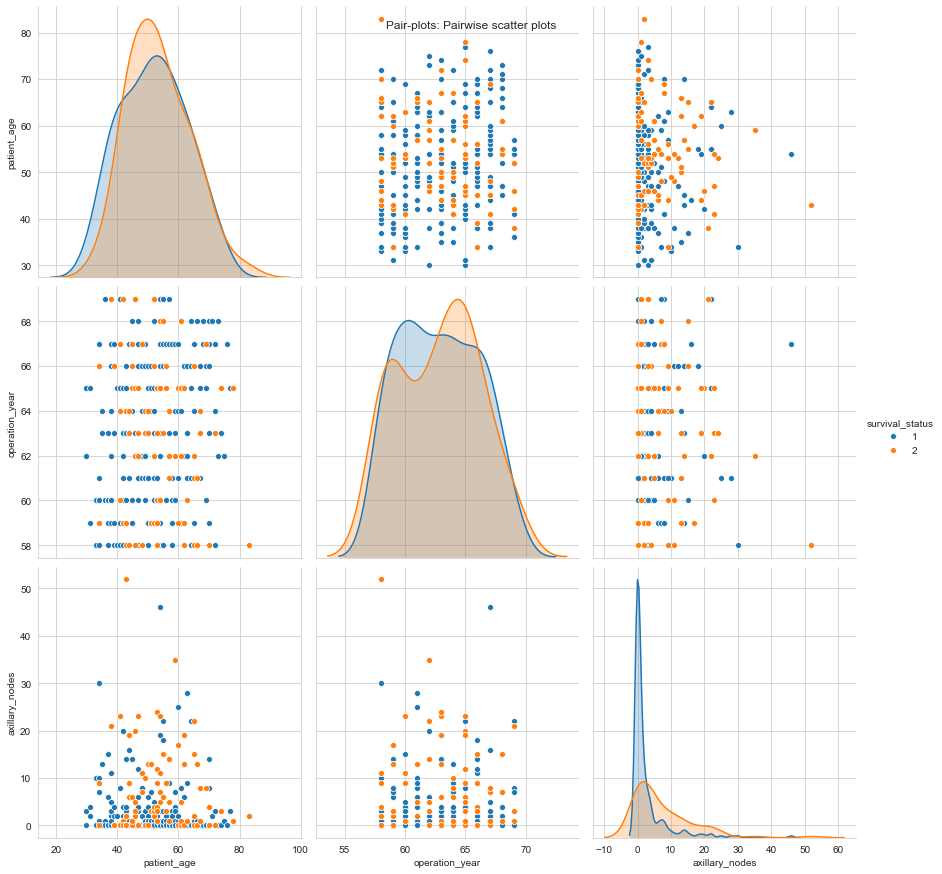

In [86]:
# pairwise scatter plot: Pair-Plot
# Disadvantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height=4)
plt.suptitle("Pair-plots: Pairwise scatter plots")
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

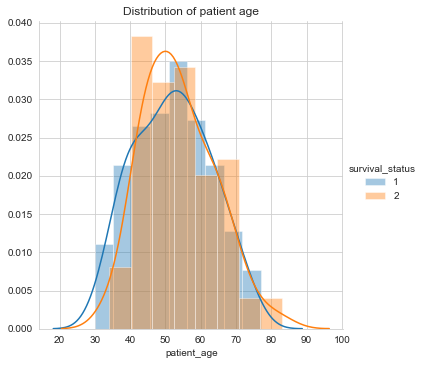

In [87]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title("Distribution of patient age")
plt.show();

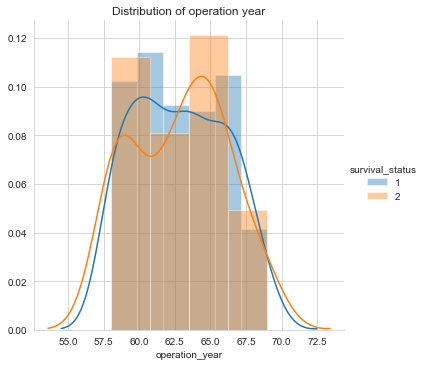

In [88]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.title("Distribution of operation year")
plt.show();

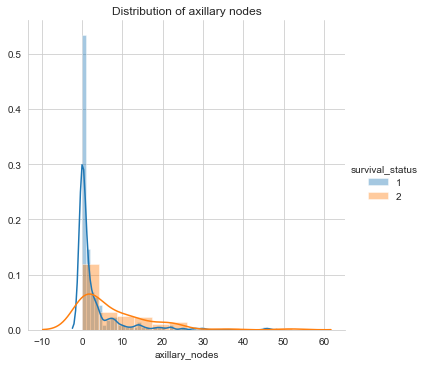

In [89]:
sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "axillary_nodes") \
   .add_legend();
plt.title("Distribution of axillary nodes")
plt.show();

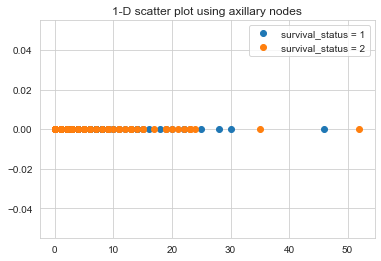

In [90]:
# What about 1-D scatter plot using just one feature?

import numpy as np
class1 = haberman.loc[haberman["survival_status"] == 1];
class2 = haberman.loc[haberman["survival_status"] == 2];

plt.plot(class1["axillary_nodes"], np.zeros_like(class1['axillary_nodes']), 'o', label='survival_status = 1')
plt.plot(class2["axillary_nodes"], np.zeros_like(class2['axillary_nodes']), 'o', label='survival_status = 2')
plt.title("1-D scatter plot using axillary nodes")
plt.legend()
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


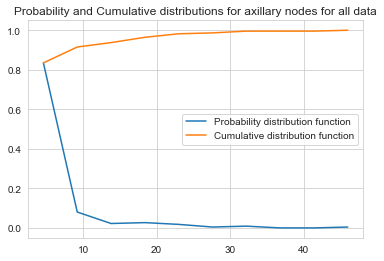

In [91]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of long survivors have less than 5 axillary nodes?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of long survivors have less than 5 axillary nodes?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(class1['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='Probability distribution function')
plt.plot(bin_edges[1:], cdf, label='Cumulative distribution function')
plt.title("Probability and Cumulative distributions for axillary nodes for all data")
plt.legend()
plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


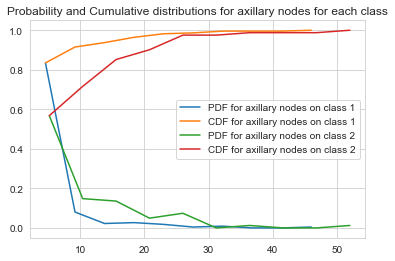

In [92]:
# survival_status = 1 or class1 with patients surviving 5 years or longer
counts, bin_edges = np.histogram(class1['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF for axillary nodes on class 1')
plt.plot(bin_edges[1:], cdf, label='CDF for axillary nodes on class 1')
plt.title("Probability and Cumulative distributions for axillary nodes for each class")


# survival_status = 2 or class2 with patients dying within 5 years
counts, bin_edges = np.histogram(class2['axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF for axillary nodes on class 2')
plt.plot(bin_edges[1:], cdf, label='CDF for axillary nodes on class 2')
plt.legend()
plt.show();

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


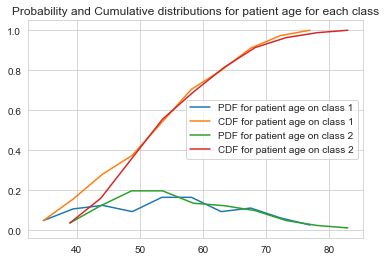

In [93]:
# survival_status = 1 or class1 with patients surviving 5 years or longer
counts, bin_edges = np.histogram(class1['patient_age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF for patient age on class 1')
plt.plot(bin_edges[1:], cdf, label='CDF for patient age on class 1')
plt.title("Probability and Cumulative distributions for patient age for each class")

# survival_status = 2 or class2 with patients dying within 5 years
counts, bin_edges = np.histogram(class2['patient_age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF for patient age on class 2')
plt.plot(bin_edges[1:], cdf, label='CDF for patient age on class 2')
plt.legend()
plt.show();

In [94]:
#Mean, Variance, Std-deviation,
print("Values for positive axillary nodes in long survivors and short survivors, respectively:")
print("Means:")
print(np.mean(class1["axillary_nodes"]))
print(np.mean(class2["axillary_nodes"]))

print("\nStd-dev:");
print(np.std(class1["axillary_nodes"]))
print(np.std(class2["axillary_nodes"]))

Values for positive axillary nodes in long survivors and short survivors, respectively:
Means:
2.799107142857143
7.45679012345679

Std-dev:
5.869092706952767
9.128776076761632


In [95]:
# Mean, Median, Quantiles, Percentiles, IQR.

print("Values for positive axillary nodes in long survivors and short survivors, respectively:")
print("\nMedians:")
print(np.median(class1["axillary_nodes"]))
print(np.median(class2["axillary_nodes"]))

print("\nQuantiles:")
print(np.percentile(class1["axillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(class2["axillary_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(class1["axillary_nodes"],90))
print(np.percentile(class2["axillary_nodes"],45))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(class1["axillary_nodes"]))
print(robust.mad(class2["axillary_nodes"]))

Values for positive axillary nodes in long survivors and short survivors, respectively:

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
3.0

Median Absolute Deviation
0.0
5.930408874022408


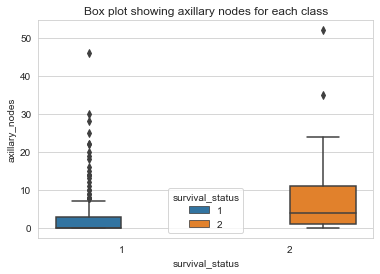

In [96]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='survival_status',y='axillary_nodes', hue='survival_status', data=haberman)
plt.title("Box plot showing axillary nodes for each class")
plt.show()

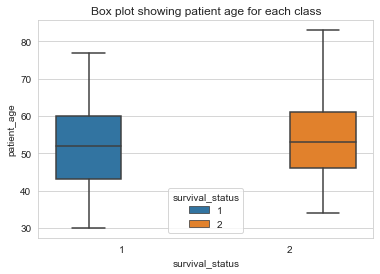

In [97]:
sns.boxplot(x='survival_status',y='patient_age', hue='survival_status', data=haberman)
plt.title("Box plot showing patient age for each class")
plt.show()

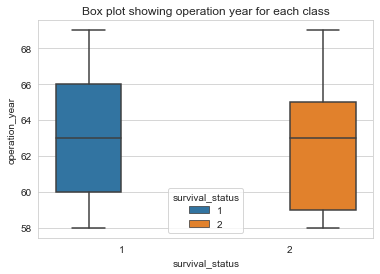

In [98]:
sns.boxplot(x='survival_status',y='operation_year', hue='survival_status', data=haberman)
plt.title("Box plot showing operation year for each class")
plt.show()

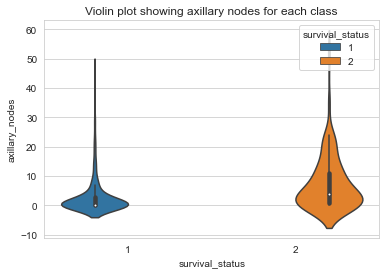

In [99]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="survival_status", y="axillary_nodes", hue='survival_status', data=haberman, size=10)
plt.title("Violin plot showing axillary nodes for each class")
plt.show()

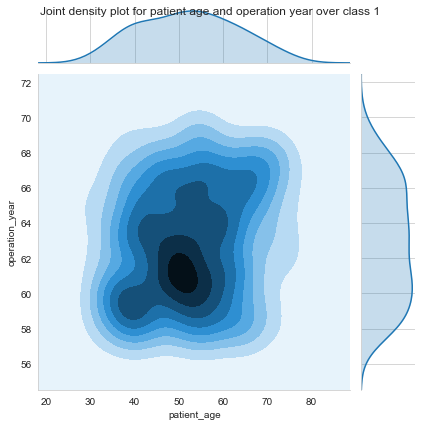

In [104]:
#2D Density plot, contors-plot
sns.jointplot(x="patient_age", y="operation_year", data=class1, kind="kde");
plt.suptitle("Joint density plot for patient age and operation year over class 1")
plt.show();

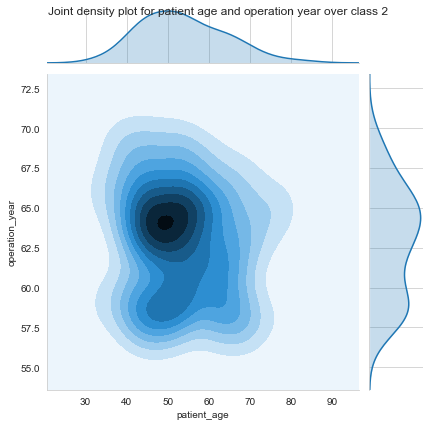

In [105]:
#2D Density plot, contors-plot
sns.jointplot(x="patient_age", y="operation_year", data=class2, kind="kde");
plt.suptitle("Joint density plot for patient age and operation year over class 2")
plt.show();

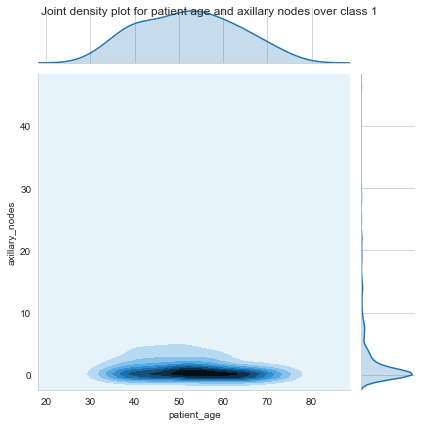

In [106]:
#2D Density plot, contors-plot
sns.jointplot(x="patient_age", y="axillary_nodes", data=class1, kind="kde");
plt.suptitle("Joint density plot for patient age and axillary nodes over class 1")
plt.show();

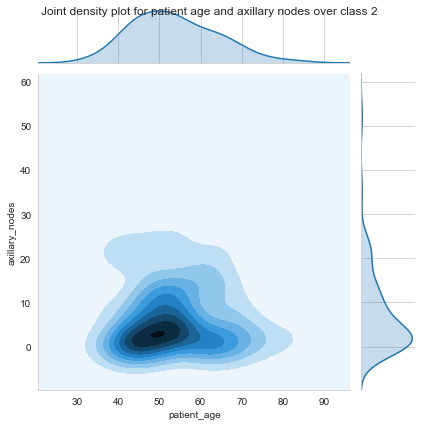

In [107]:
#2D Density plot, contors-plot
sns.jointplot(x="patient_age", y="axillary_nodes", data=class2, kind="kde");
plt.suptitle("Joint density plot for patient age and axillary nodes over class 2")
plt.show();

Percentage of patients having axillary nodes <= 2 in long surviving patients:
0.7321428571428571
Percentage of patients having axillary nodes <= 2 in short surviving patients:
0.3950617283950617

Ratio of long surviving patients with operations between 1962-1965 to total long surviving patients:
0.33482142857142855
Ratio of short surviving patients with operations between 1962-1965 to total short surviving patients:
0.4444444444444444

The maximum number of positive axillary nodes is = 52
Choosing a cut-off value of 0 for the axillary nodes yields a confusion matrix of the form: 
 TP = 62 | FP = 107 
 TN = 117 | FN = 19
Precision = 0.3668639053254438, Recall = 0.7654320987654321 and f1-score = 0.496
Choosing a cut-off value of 1 for the axillary nodes yields a confusion matrix of the form: 
 TP = 54 | FP = 75 
 TN = 149 | FN = 27
Precision = 0.4186046511627907, Recall = 0.6666666666666666 and f1-score = 0.5142857142857143
Choosing a cut-off value of 2 for the axillary nodes yields a co

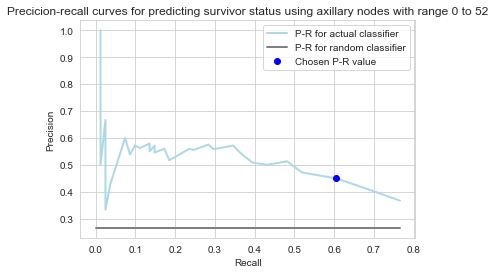

The best cutoff value for axillary nodes is 2 with an f1-score of 0.5157894736842106


In [110]:
# Some calculations that are used to derive the inferences above
# A simple classifier was actually built and studied

import matplotlib.pyplot as plt

print("Percentage of patients having axillary nodes <= 2 in long surviving patients:")
p = haberman.loc[(haberman['axillary_nodes'] <= 2) & (haberman['survival_status'] == 1)]['patient_age'].count()
q = haberman.loc[(haberman['survival_status'] == 1)]['patient_age'].count()
print(p/q)
p2 = haberman.loc[(haberman['axillary_nodes'] <= 2) & (haberman['survival_status'] == 2)]['patient_age'].count()
q2 = haberman.loc[(haberman['survival_status'] == 2)]['patient_age'].count()
print("Percentage of patients having axillary nodes <= 2 in short surviving patients:")
print(p2/q2)
print()
x = haberman.loc[(haberman['operation_year'].between(62, 65)) & (haberman['survival_status'] == 1)]['patient_age'].count()
#print(x)
y = haberman.loc[(haberman['survival_status'] == 1)]['patient_age'].count()
#print(y)
ratio = x / y
x2 = haberman.loc[(haberman['operation_year'].between(62, 65)) & (haberman['survival_status'] == 2)]['patient_age'].count()
y2 = haberman.loc[(haberman['survival_status'] == 2)]['patient_age'].count()
#print(x2)
#print(y2)
ratio2 = x2 / y2
print("Ratio of long surviving patients with operations between 1962-1965 to total long surviving patients:")
print(ratio)
print("Ratio of short surviving patients with operations between 1962-1965 to total short surviving patients:")
print(ratio2)

# Experimenting with a classifier which says:
# If axillary_nodes > cutoff then class 2 else class 1.
precList = []
recList = []
fList = []
maxPositiveNodes = haberman['axillary_nodes'].max()
print()
print("The maximum number of positive axillary nodes is = {}".format(maxPositiveNodes))
for i in range(maxPositiveNodes):
    #print()
    cutoff = i
    TP = haberman.loc[(haberman['axillary_nodes'] > cutoff) & (haberman['survival_status'] == 2)]['patient_age'].count()
    TN = haberman.loc[(haberman['axillary_nodes'] <= cutoff) & (haberman['survival_status'] == 1)]['patient_age'].count()
    FP = haberman.loc[(haberman['axillary_nodes'] > cutoff) & (haberman['survival_status'] == 1)]['patient_age'].count()
    FN = haberman.loc[(haberman['axillary_nodes'] <= cutoff) & (haberman['survival_status'] == 2)]['patient_age'].count()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2*precision*recall/(precision+recall)
    precList.append(precision)
    recList.append(recall)
    fList.append(f1_score)
    if (f1_score > 0.49):
        print("Choosing a cut-off value of {} for the axillary nodes yields a confusion matrix of the form: \n TP = {} | FP = {} \n TN = {} | FN = {}".format(cutoff, TP, FP, TN, FN))
        print("Precision = {}, Recall = {} and f1-score = {}".format(precision, recall, f1_score))

cutoff = max(range(len(fList)), key=fList.__getitem__)
plt.plot(recList, precList, color='lightblue', linewidth=2, label = 'P-R for actual classifier')
#print(haberman.shape[0])
baseline = haberman.loc[haberman['survival_status'] == 2]['patient_age'].count() / haberman.shape[0]
#print(baseline)
plt.plot([0, max(recList)], [baseline, baseline], color='grey', linewidth=2, label = 'P-R for random classifier')
plt.plot(recList[cutoff], precList[cutoff], 'o', color = 'blue', label = 'Chosen P-R value')
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.style.use('seaborn-whitegrid')
#plt.axis('equal')
#plt.axis('tight');
plt.legend();
plt.title("Precicion-recall curves for predicting survivor status using axillary nodes with range 0 to {}".format(maxPositiveNodes))
plt.show()

print("The best cutoff value for axillary nodes is {} with an f1-score of {}".format(cutoff, fList[cutoff]))

# Summary of observations

1. The data set is skewed as it has most examples of class 1 or long survivors (224) than of class 2 or short survivors (81).

2. The pair plots and the 3d scatter-plot show that the two classes are not linearly separable using the attributes in the dataset.

3. The 3d scatter-plot proved useful in showing that the number of positive axillary nodes may be slightly useful at predicting the outcome of patients. Simple calculations show that 73 percent of patients have axillary nodes <= 2 in long surviving patients while that figure is 39.5 percent for short surviving patients. Note that we do account for the difference in sample sizes for the two classes by dividing the figures by the corresponding class total.

4. This trend can be seen from the percentiles for classes 1 and 2 for count of positive axillary nodes. The median values for long term and short term survivors are 0 and 4, respectively. About 90 percent of the long survivors have 8 or fewer positive nodes while about 65 percent of short survivors have 8 or fewer positive nodes. 90th percentile values for the two classes are 8.0 and 20.0, respectively. Again, caution has to be taken that we have far fewer samples for short term survivors.

5. The box-plots show a similar story and the marginally useful plot is when we take the axillary nodes attribute and the rest of the plots yeild no help other than confirming that those attributes cannot be useful at predicting. Even with axillary nodes, we find that the 50th percentile mark for class two (corresponding to axillary nodes value = 4) is slightly higher than the 75th percentile mark for class one (axillary nodes value = 3). This means that it is better than a random classifier.

6. The joint density plots are interesting. Apart from reaffirming the above observations, there are some small trends worth noting. 44% of short surviving patients had operations between 1962-1965 while 33% of long surviving patients had operations between 1962-1965. Note that we do account for the difference in sample sizes for the two classes by dividing the figures by the corresponding class total. Assuming that the data is representative, this indicates an increased risk of being in class 2 during this time period. Again, this may only be a peculiarity in the data samples chosen and not necessarily a general trend.

7. Experimenting with a classifier which says:

    <strong><em> If axillary_nodes > cutoff then class 2 else class 1.</em></strong>
    
    Since the data is imbalanced, we cannot use prediction accuracy. Instead, we plot the precision-recall curves and compute the f1-score for each value of cutoff between a range of [0, 51]. We try to identify the best value using the highest f1-score. For comparison, the performance of this classifier against a baseline classifier, which makes random predictions, is also shown. Note that the baseline classifier for P-R curves is defined by a horizontal line with height = (total positive values) / (all data values).
    
    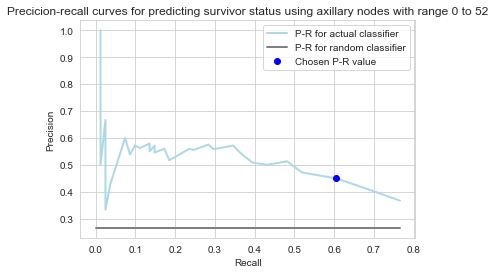
    
     Now, we find that cutoff = 2 actually yields the best results. Choosing a cut-off value of 2 for the axillary nodes yields a confusion matrix of the form:
     
     TP = 49 | FP = 60
     
     TN = 164 | FN = 32
     
     Precision = 0.44954128440366975, Recall = 0.6049382716049383 and f-score = 0.5157894736842106